In [34]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

print(__doc__)

Automatically created module for IPython interactive environment


In [35]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(message)s')

In [36]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [45]:
n_samples,h,w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [16]:
print('Total dataset size:')
print(f'number of samples = {n_samples}')
print(f'number of features = {n_features}')
print(f'number of classes = {n_classes}')

Total dataset size:
number of samples = 1217
number of features = 1850
number of classes = 6


In [54]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

[1, 1, -1, -1, 1, 1, -1]


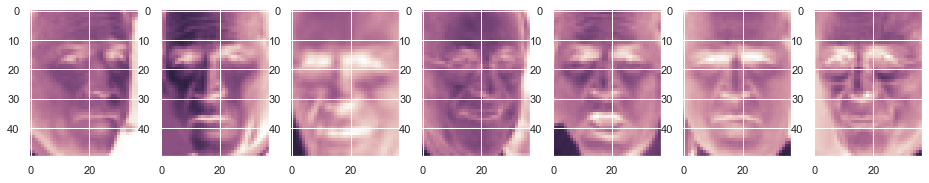

In [92]:
X_data = []
y_data = []
M = 7

my_cmap = sns.cubehelix_palette(light=1, as_cmap=True)

for i in range(len(X)):
    if y[i] == 3 or y[i] == 2:
        X_data = X_data + [X[i]]
        y_data = y_data + [y[i]]
y_data = list(map(lambda x: 1 if x==3 else -1, y_data))
print(y_data[M:2*M])
plt.figure(figsize=(16,20))
for i in range(M):
    plt.subplot(1,M,i+1)
    plt.imshow(X_data[i+7].reshape(h,w), cmap = my_cmap)

In [86]:
# Split into training/testing sets
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=42)